In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm

In [2]:
voltages = np.arange(101,1001,1,dtype=int)

In [3]:
voltages2 = voltages/10
voltages2
len(voltages2)

900

In [4]:
readInData = pd.read_csv('Oct30_SinglePixelData.csv')
readInData

,b,d,converted,firstBit,secondBit,thirdBit,firstBitInvert,secondBitInvert,thirdBitInvert
0,101,252.0,11111100.0,1.0,1.0,1.0,0.0,0.0,0.0
1,102,252.0,11111100.0,1.0,1.0,1.0,0.0,0.0,0.0
2,103,252.0,11111100.0,1.0,1.0,1.0,0.0,0.0,0.0
3,104,252.0,11111100.0,1.0,1.0,1.0,0.0,0.0,0.0
4,105,252.0,11111100.0,1.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
895,996,140.0,10001100.0,0.0,0.0,0.0,1.0,1.0,1.0
896,997,140.0,10001100.0,0.0,0.0,0.0,1.0,1.0,1.0
897,998,140.0,10001100.0,0.0,0.0,0.0,1.0,1.0,1.0
898,999,140.0,10001100.0,0.0,0.0,0.0,1.0,1.0,1.0


Text(0, 0.5, 'fraction')

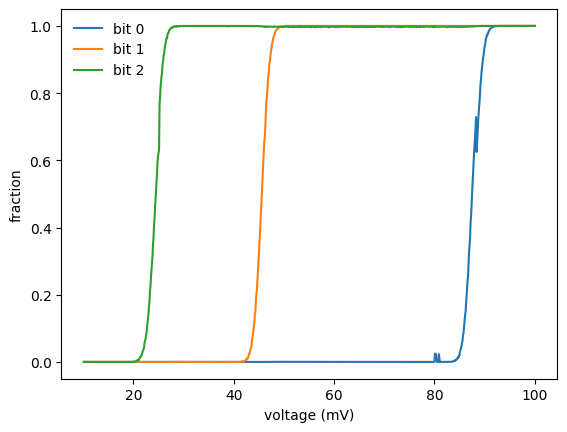

In [9]:
#ydata0 = readInData['firstBit'].to_numpy().flatten()
#ydata1 = readInData['secondtBit'].to_numpy().flatten()
#ydata2 = readInData['thirdBit'].to_numpy().flatten()
ydata0 = readInData['firstBitInvert'].to_numpy().flatten()
ydata1 = readInData['secondBitInvert'].to_numpy().flatten()
ydata2 = readInData['thirdBitInvert'].to_numpy().flatten()

plt.plot(voltages2,ydata0, label='bit 0')
plt.plot(voltages2,ydata1, label='bit 1')
plt.plot(voltages2,ydata2, label='bit 2')
plt.legend(loc='upper left',framealpha=0.0)
plt.xlabel('voltage (mV)')
plt.ylabel('fraction')

In [6]:
# The first parameter is the mean and the second is the stdev, so I set it to -inf to +inf for the mean and 0 to inf for the stdev.
#For the initial guess for the fit, you can adjust the p0 values (first value is the initial guess of the mean, second is guess for the standard deviation.
fitResult=curve_fit(f=norm.cdf, xdata=voltages2.flatten(), ydata=ydata0,p0=[10,1],bounds=((-np.inf,0),(np.inf,np.inf)))
mean_, std_=fitResult[0]
print(f"Mean {mean_:.4f}, StdDev {std_:.4f}")
print('Covariance matrix:')
print(fitResult[1])

Mean 87.6417, StdDev 1.5151
Covariance matrix:
[[ 3.31996282e-05 -1.42486752e-11]
 [-1.42486752e-11  6.63992574e-05]]


In [7]:
fitResult=curve_fit(f=norm.cdf, xdata=voltages2.flatten(), ydata=ydata1,p0=[10,1],bounds=((-np.inf,0),(np.inf,np.inf)))
mean_, std_=fitResult[0]
print(f"Mean {mean_:.4f}, StdDev {std_:.4f}")
print('Covariance matrix:')
print(fitResult[1])

Mean 45.5829, StdDev 1.2684
Covariance matrix:
[[ 4.93562968e-07 -1.33632922e-13]
 [-1.33632922e-13  9.87125940e-07]]


In [8]:
fitResult=curve_fit(f=norm.cdf, xdata=voltages2.flatten(), ydata=ydata2, p0=[10,1],bounds=((-np.inf,0),(np.inf,np.inf)))
mean_, std_=fitResult[0]
print(f"Mean {mean_:.4f}, StdDev {std_:.4f}")
print('Covariance matrix:')
print(fitResult[1])

Mean 24.4037, StdDev 1.2915
Covariance matrix:
[[ 1.29864756e-05 -1.81079847e-12]
 [-1.81079847e-12  2.59729513e-05]]
